In [27]:
import pandas as pd
import matplotlib.pyplot as plt

url = '/Users/ipekoner/Downloads/olympics/olympic_results.csv'
df = pd.read_csv(url)
df.head()


,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(162804, 15)

In [5]:
df["slug_game"].value_counts()

slug_game
rio-2016                       7672
london-2012                    7531
beijing-2008                   7360
atlanta-1996                   7117
sydney-2000                    7091
athens-2004                    6979
barcelona-1992                 6878
tokyo-2020                     6863
seoul-1988                     6348
los-angeles-1984               5007
helsinki-1952                  4626
munich-1972                    3969
beijing-2022                   3784
pyeongchang-2018               3707
montreal-1976                  3670
sochi-2014                     3666
mexico-city-1968               3569
vancouver-2010                 3322
turin-2006                     3256
moscow-1980                    3214
tokyo-1964                     3172
rome-1960                      3170
london-1948                    3134
paris-1924                     3035
salt-lake-city-2002            3008
berlin-1936                    2921
albertville-1992               2783
melbourne-1956    

In [15]:
countries = set()
for name in df["country_name"]:
    country = name.split('-')[0] 
    countries.add(country)  
unique_countries = sorted(countries)
print(unique_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australasia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bohemia', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'Chinese Taipei', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of Timor', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Federal Republic 

In [21]:
different_countries = df["country_name"].nunique()
different_countries_names = df["country_name"].unique()
print(f"There are {different_countries} many countries and here are all unique countries:\n {different_countries_names}")


There are 238 many countries and here are all unique countries:
 ['Italy' 'Norway' 'Sweden' 'Great Britain' 'Canada' 'Czech Republic'
 'Switzerland' 'United States of America' "People's Republic of China"
 'Australia' 'Japan' 'Republic of Korea' 'Denmark' 'ROC' 'Finland'
 'Kazakhstan' 'France' 'New Zealand' 'Ireland' 'Austria' 'Spain' 'Germany'
 'Estonia' 'Chile' 'Brazil' 'Belarus' 'Ukraine' 'Netherlands' 'Hungary'
 'Croatia' 'Poland' 'Belgium' 'Latvia' 'Hong Kong, China' 'Israel'
 'Turkey' 'Malta' 'Andorra' 'Slovenia' 'Bulgaria' 'Slovakia' 'Romania'
 'Georgia' 'Armenia' 'Lithuania' 'Azerbaijan' 'Mexico'
 'Bosnia and Herzegovina' 'Republic of Moldova' 'Argentina'
 'Chinese Taipei' 'Puerto Rico' 'Kyrgyzstan' 'Colombia' 'India' 'Portugal'
 'San Marino' 'Philippines' 'Lebanon' 'Uzbekistan' 'Albania' 'Montenegro'
 'Greece' 'Kosovo' 'Luxembourg' 'Madagascar' 'Cyprus' 'Malaysia' 'Haiti'
 'Thailand' 'Pakistan' 'Democratic Republic of Timor-Leste' 'Iceland'
 'Monaco' 'Serbia' 'Liechtenstein' '

In [9]:
df.dtypes

discipline_title         object
event_title              object
slug_game                object
participant_type         object
medal_type               object
athletes                 object
rank_equal               object
rank_position            object
country_name             object
country_code             object
country_3_letter_code    object
athlete_url              object
athlete_full_name        object
value_unit               object
value_type               object
dtype: object

In [11]:
different_games = df["discipline_title"].nunique()
print(f"There are {different_games} many games.")

There are 86 many games.


In [13]:
df["rank_position"] = pd.to_numeric(df["rank_position"], errors = "coerce")
turkey_data = df[df["country_name"] == "Turkey"]
turkey_average = turkey_data["rank_position"].mean()
print(f"Turkey was ranked {turkey_average:.2f} on average.")

Turkey was ranked 24.58 on average.


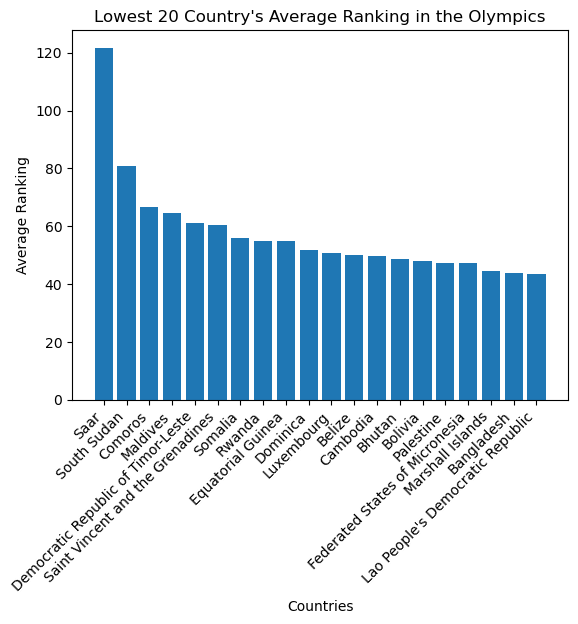

In [37]:
df["rank_position"] = pd.to_numeric(df["rank_position"], errors="coerce")
country_average_rank = df.groupby("country_name")["rank_position"].mean()
country_average_rank = country_average_rank.sort_values(ascending = False)
lowest_20 = country_average_rank.head(20)
plt.bar(lowest_20.index, lowest_20.values)
plt.xlabel("Countries")
plt.ylabel("Average Ranking")
plt.title("Lowest 20 Country's Average Ranking in the Olympics")
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.show()

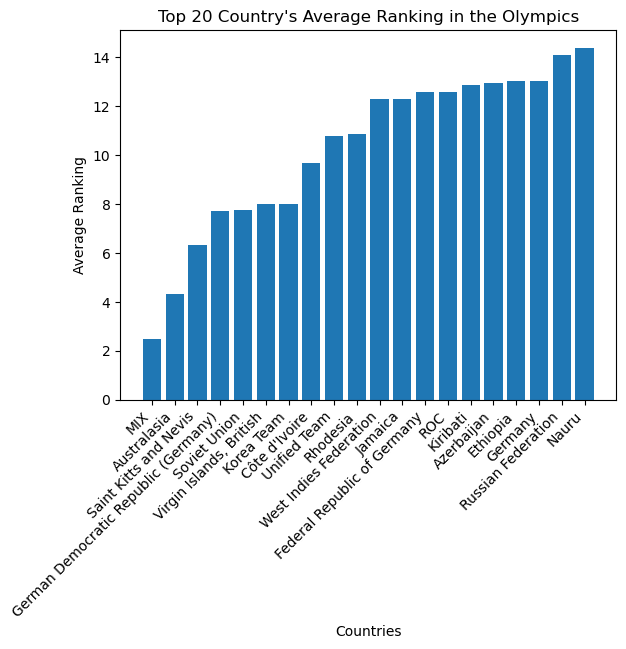

In [39]:
df["rank_position"] = pd.to_numeric(df["rank_position"], errors="coerce")
country_average_rank = df.groupby("country_name")["rank_position"].mean()
country_average_rank = country_average_rank.sort_values(ascending = True)
top_20 = country_average_rank.head(20)
plt.bar(top_20.index, top_20.values)
plt.xlabel("Countries")
plt.ylabel("Average Ranking")
plt.title("Top 20 Country's Average Ranking in the Olympics")
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.show()